In [11]:
%matplotlib inline
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
class Coordinate():
    def __init__(self, x=0., y=0., a=0.):
        self.x=x
        self.y=y
        self.a=a
        
    def _print(self):
        print self.x,",",self.y," @ ", math.degrees(self.a)

In [4]:
def getMs():
    return int(round(time.time() * 1000))

In [51]:
def draw_line(x, y, angle, alpha=1.):
    r = 0.2  # or whatever fits you
    plt.plot(x,y,'bo', alpha=alpha)
    plt.arrow(x, y, r*math.cos(angle), r*math.sin(angle), alpha=alpha)  
    
def plotMap(mcs, mcs_list):
    fig = plt.figure(figsize=(15,15))
    draw_line(mcs.x,mcs.y,mcs.a)
    
    for omcs in mcs_list:
        draw_line(omcs.x,omcs.y,omcs.a,alpha=0.2)
    plt.xlim((-10,10))
    plt.ylim((-10,10))  

In [52]:
def integrate(mcs, t):
    x = mcs.x + t.x*math.cos(mcs.a) - t.y*math.sin(mcs.a)
    y = mcs.y + t.x*math.sin(mcs.a) + t.y*math.cos(mcs.a)
    a = mcs.a + t.a
    return Coordinate(x,y,a)

0.3 , 0.0  @  0.0
0.6 , 0.0  @  0.0
0.9 , 0.0  @  0.0
1.2 , 0.0  @  0.0
1.5 , 0.0  @  0.0
1.5 , 0.0  @  22.5
1.5 , 0.0  @  45.0
1.5 , 0.0  @  67.5
1.61480502971 , 0.277163859753  @  67.5
1.72961005942 , 0.554327719507  @  67.5
1.84441508913 , 0.83149157926  @  67.5
1.95922011884 , 1.10865543901  @  67.5
1.95922011884 , 1.10865543901  @  90.0
1.95922011884 , 1.10865543901  @  112.5
1.95922011884 , 1.10865543901  @  135.0
1.74708808448 , 1.32078747337  @  135.0
1.53495605013 , 1.53291950773  @  135.0
1.32282401577 , 1.74505154208  @  135.0
1.11069198141 , 1.95718357644  @  135.0
0.898559947058 , 2.16931561079  @  135.0


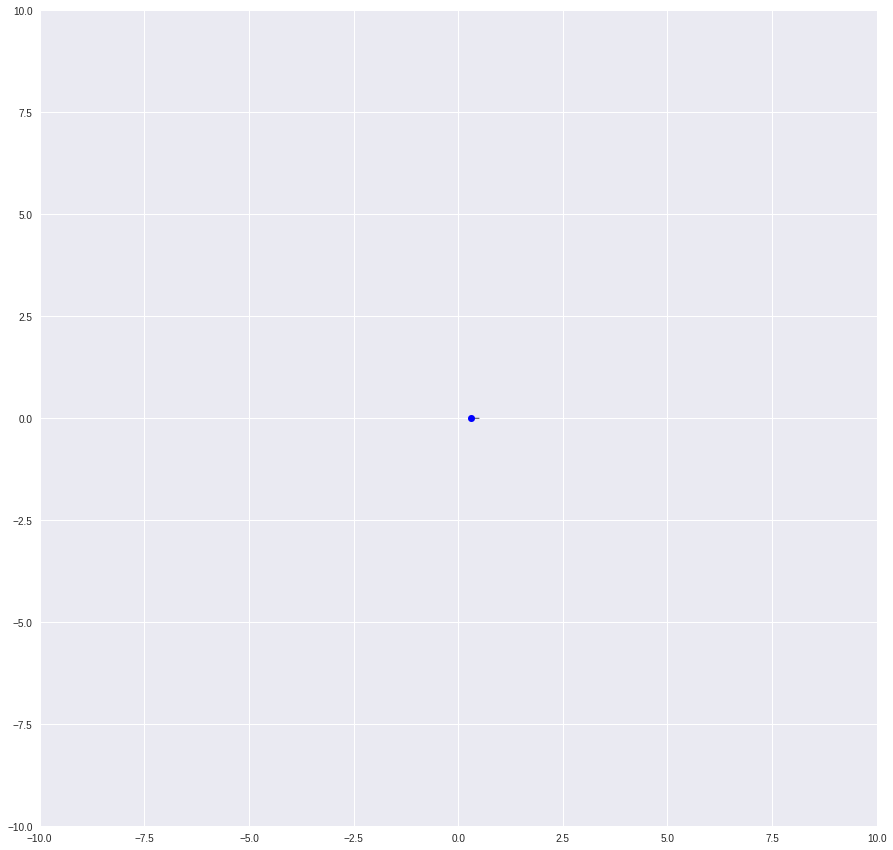

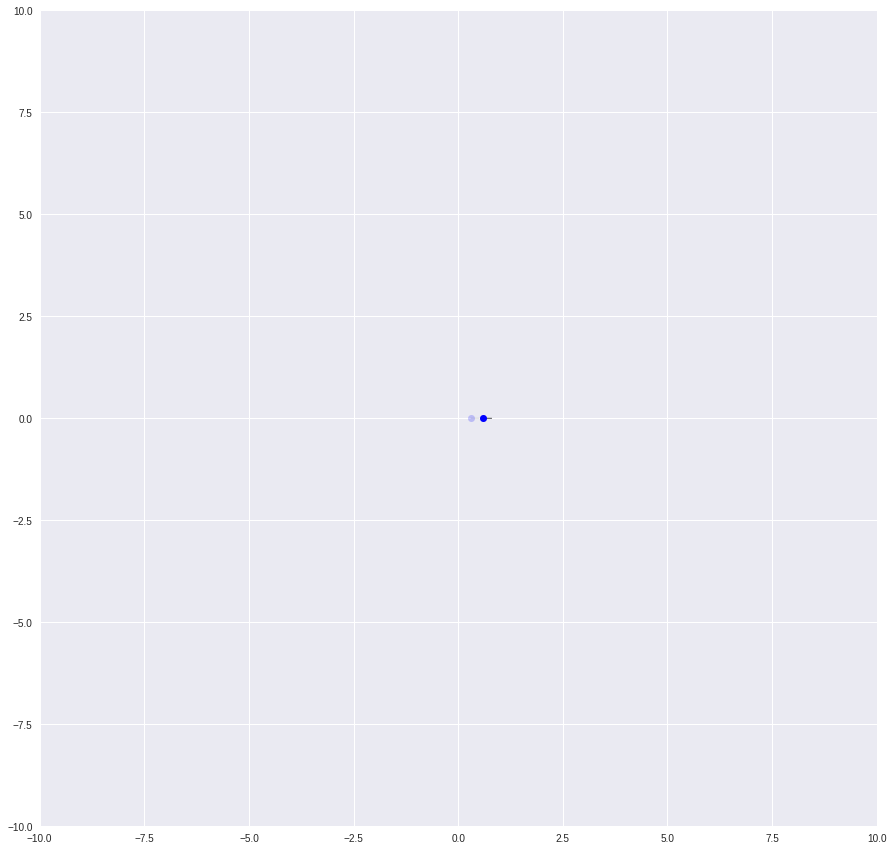

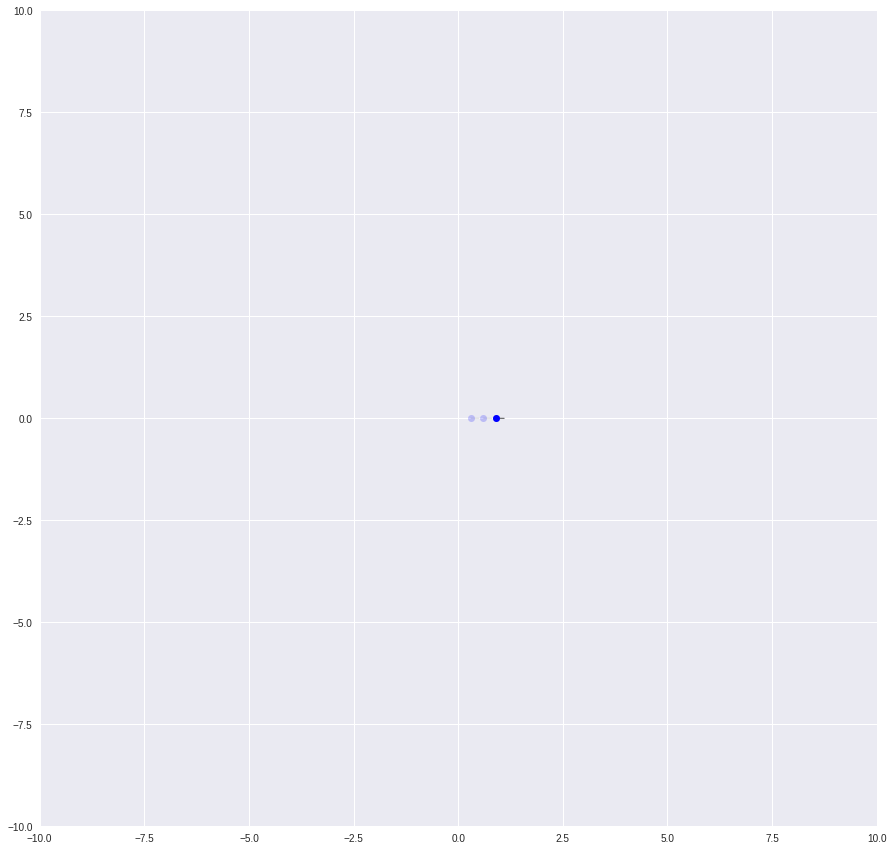

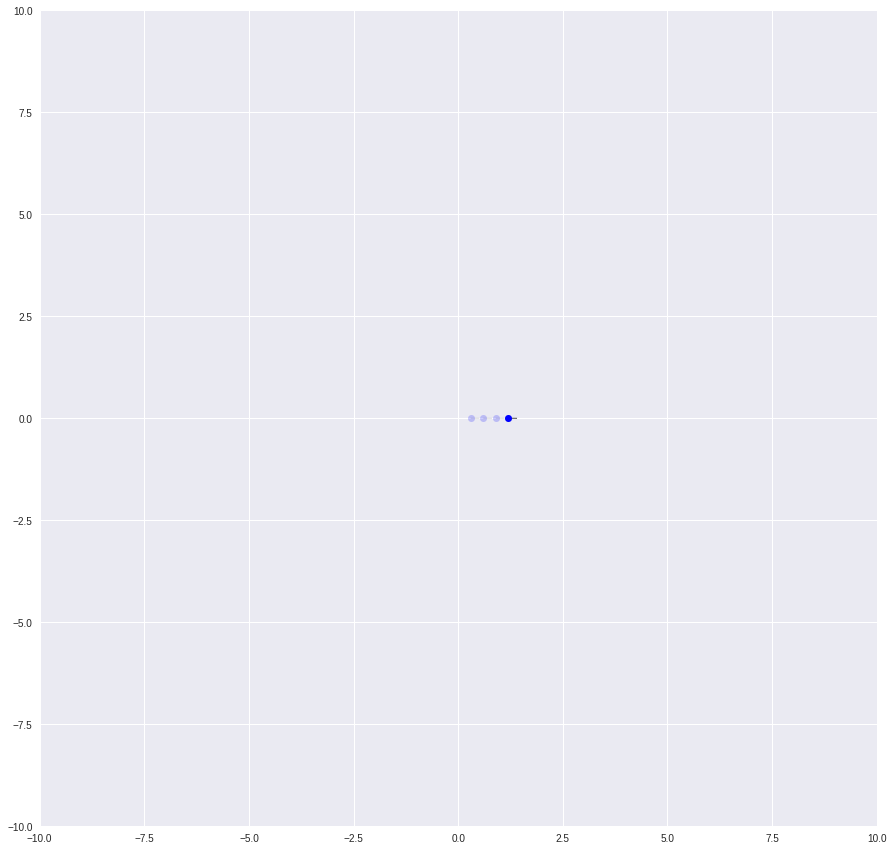

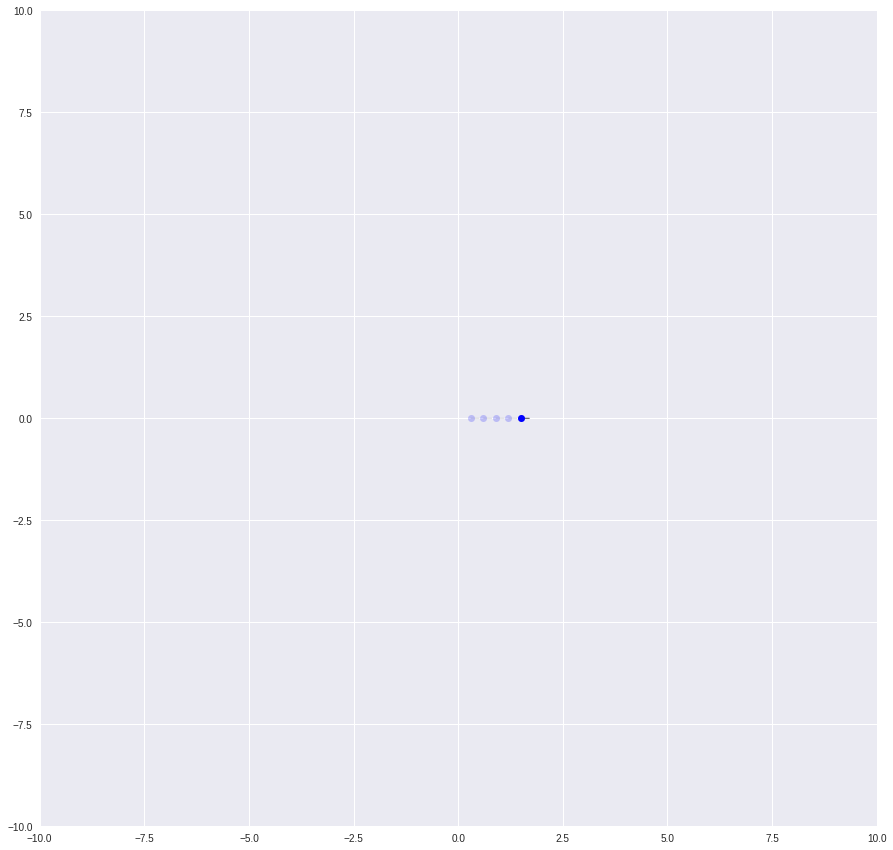

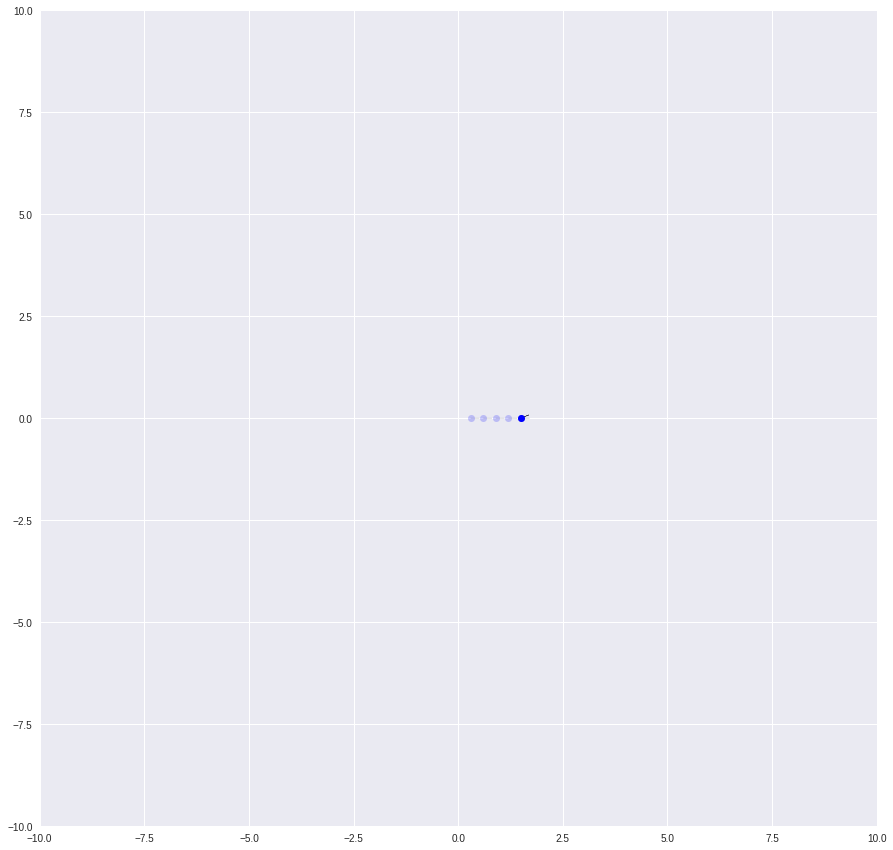

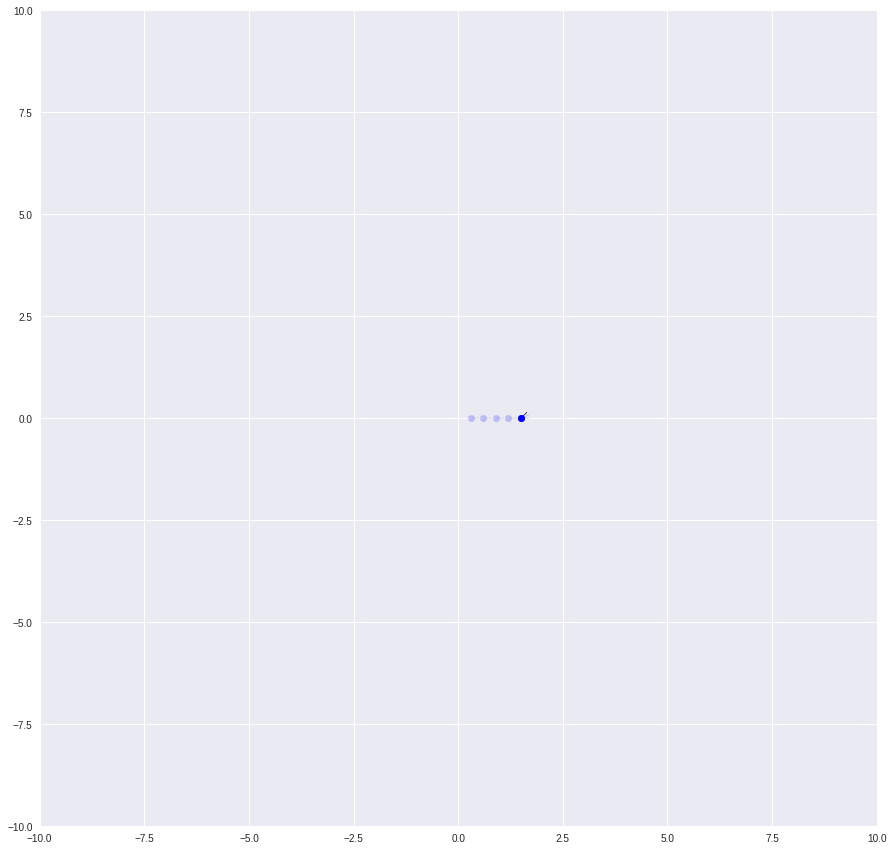

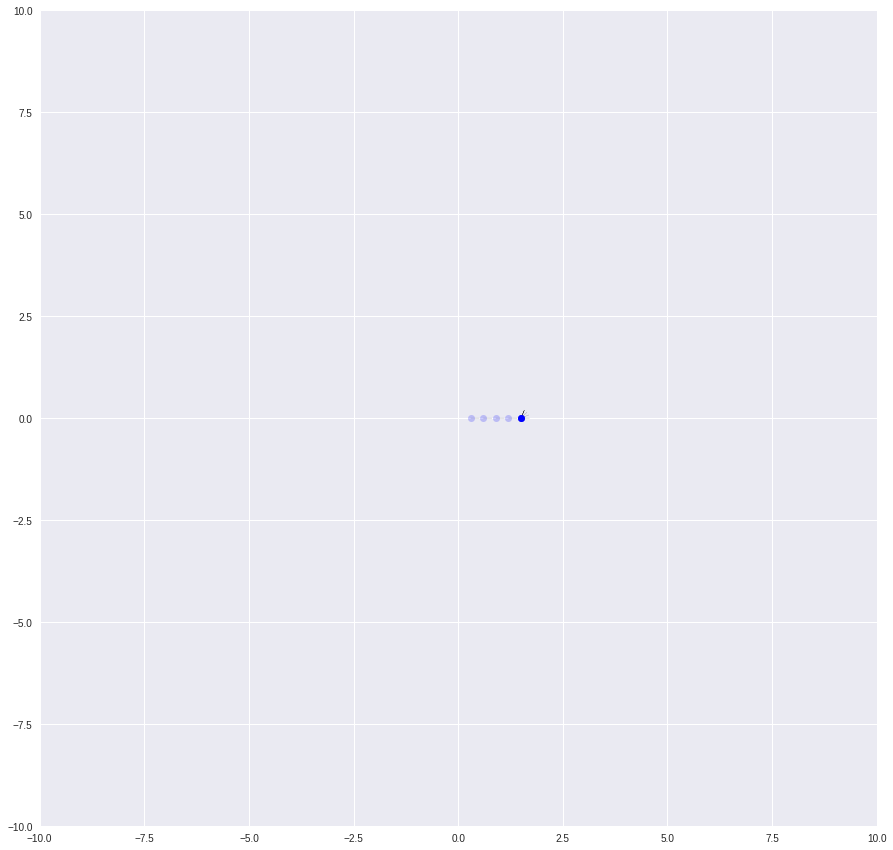

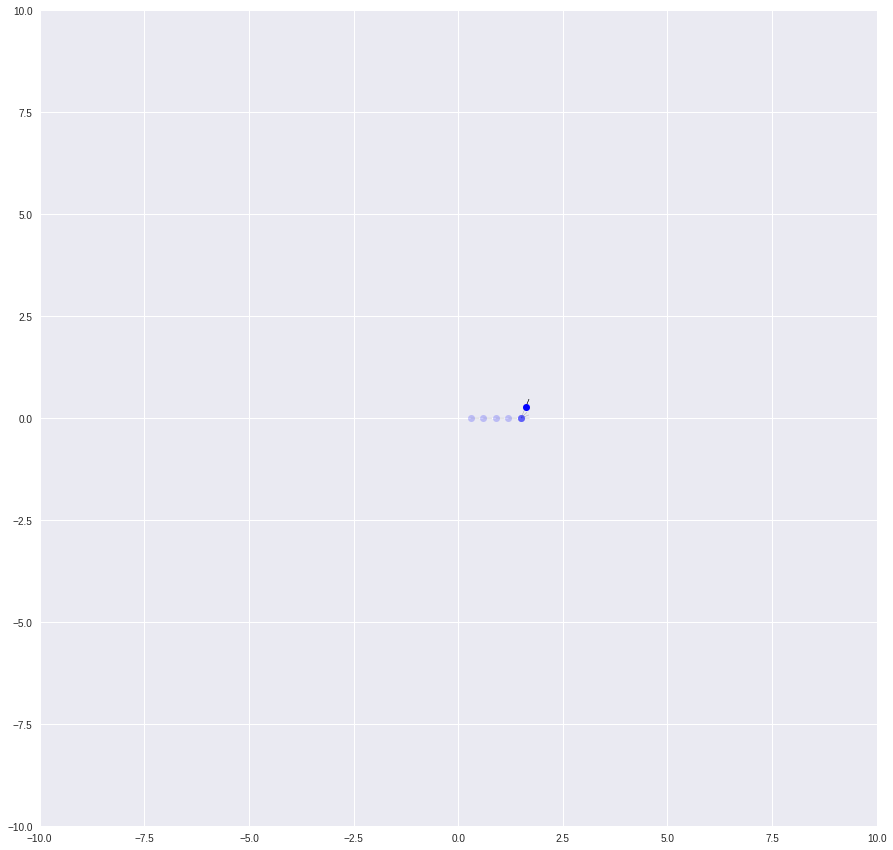

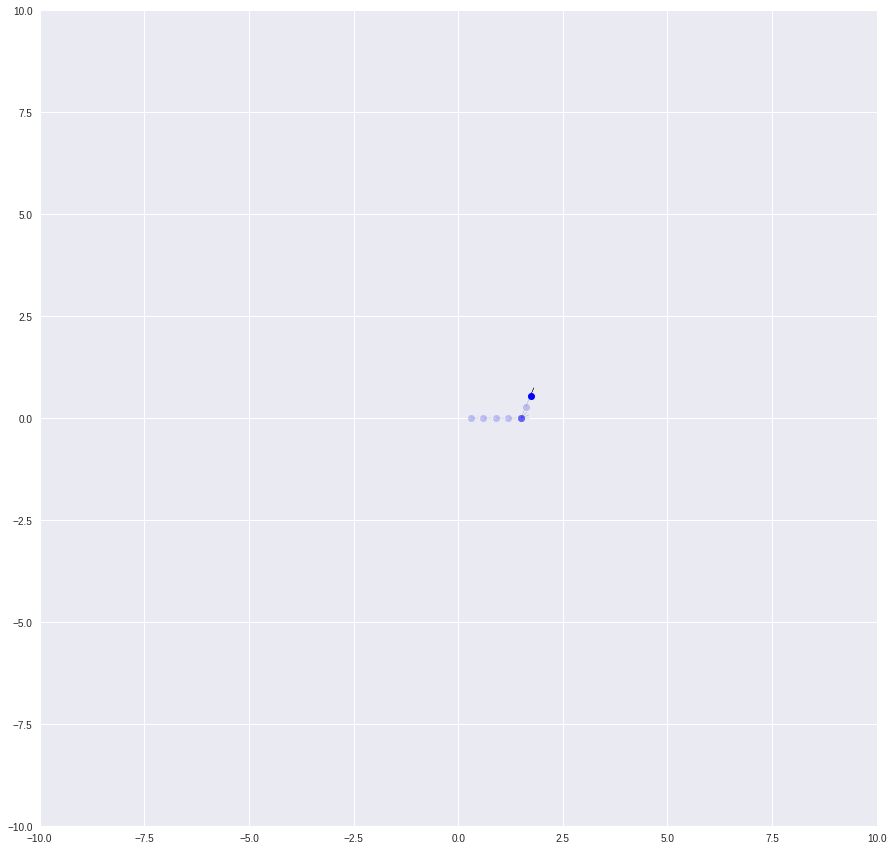

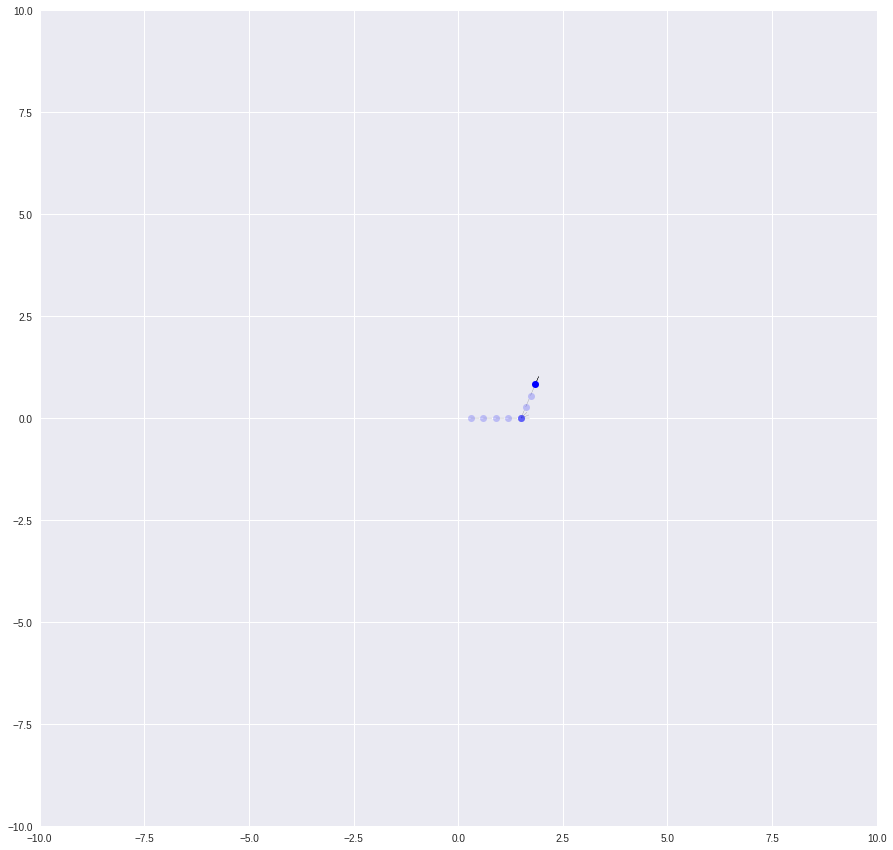

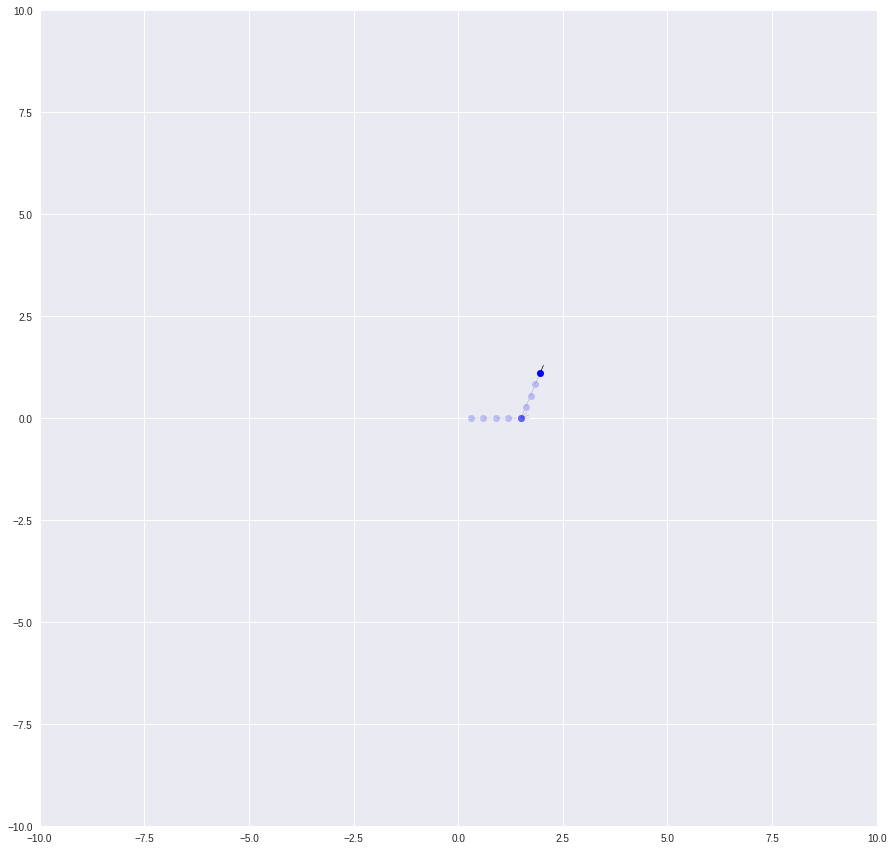

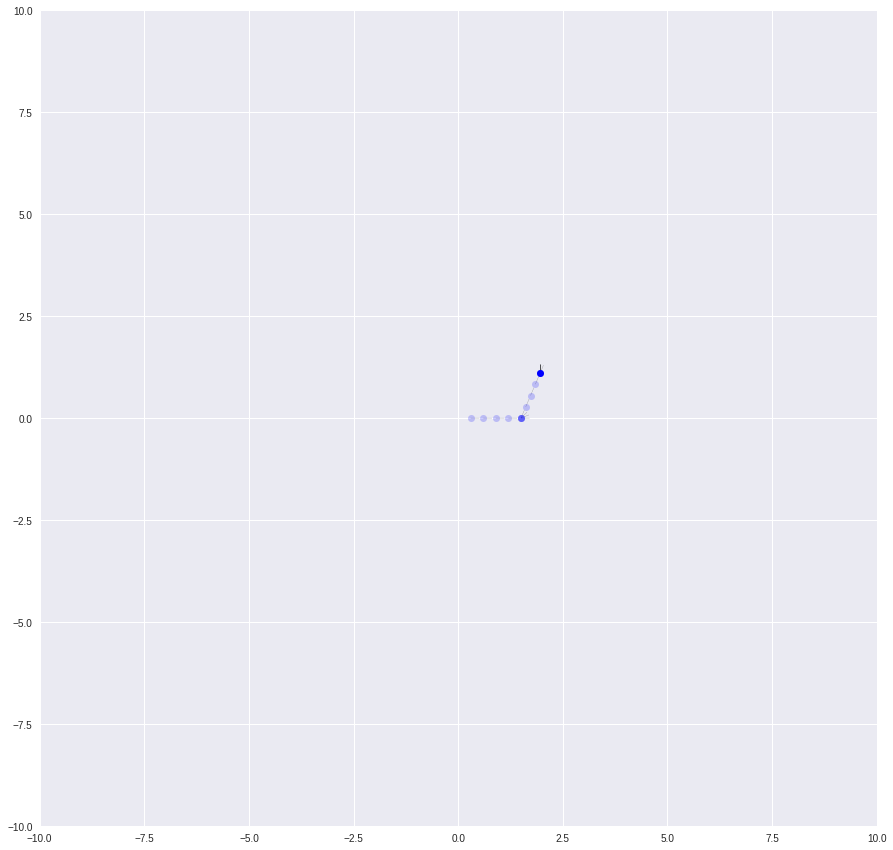

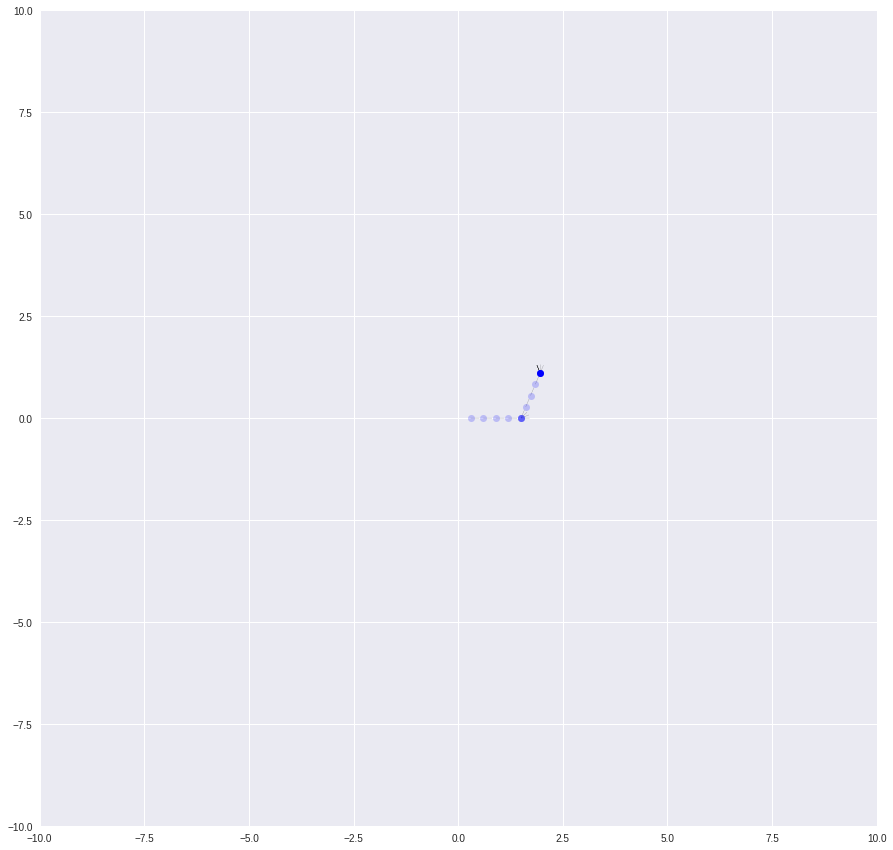

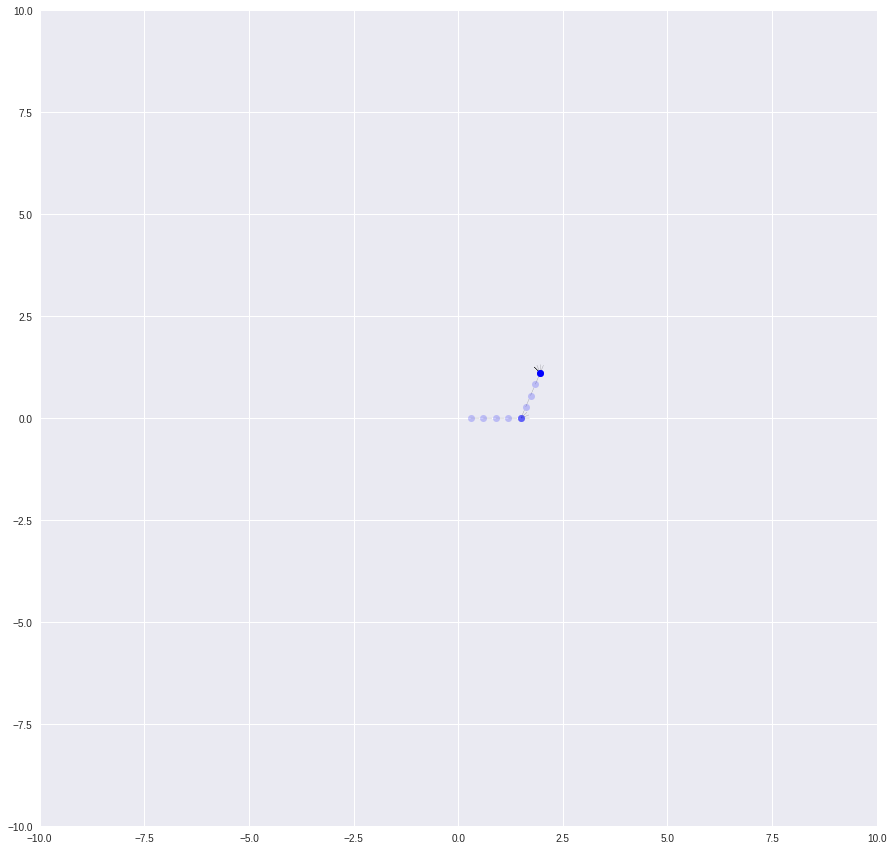

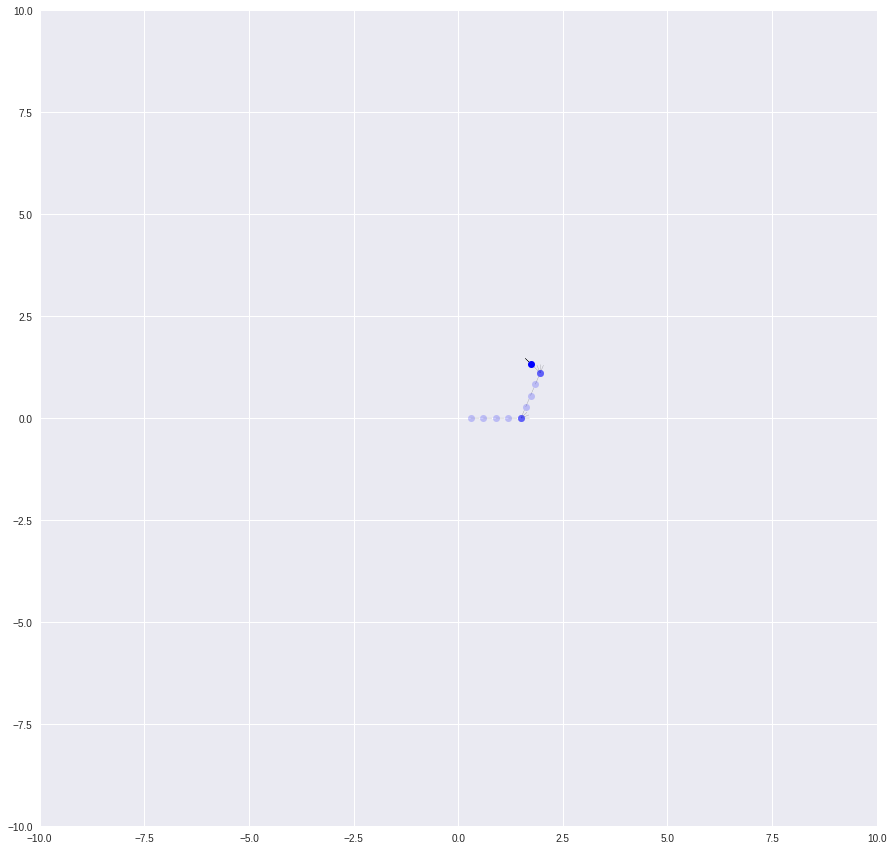

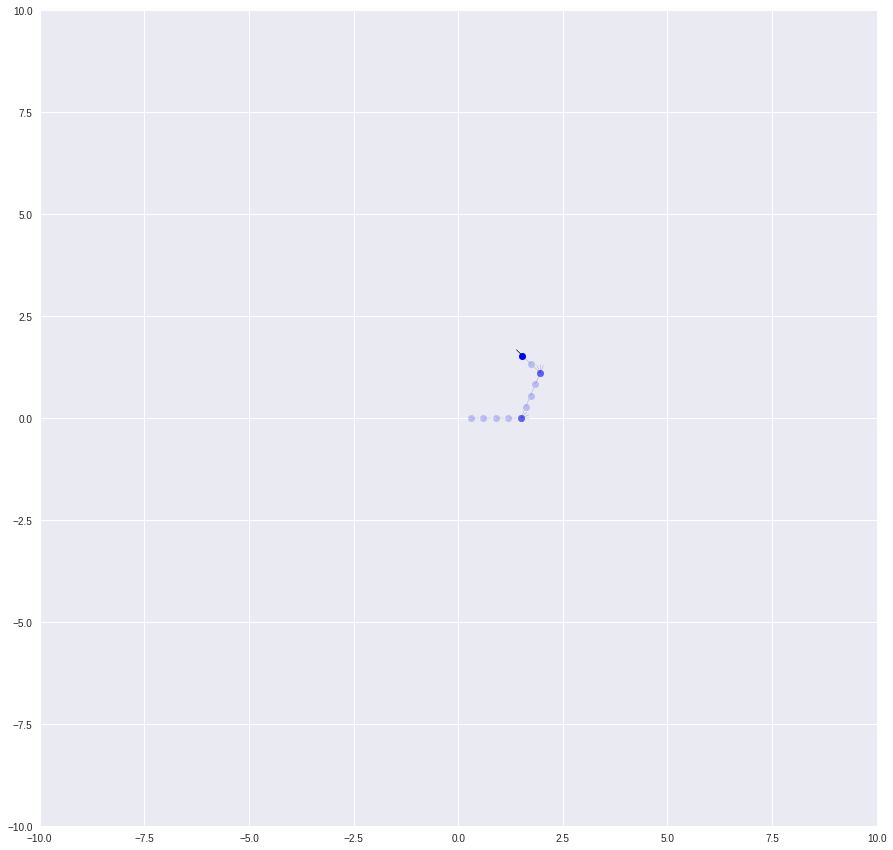

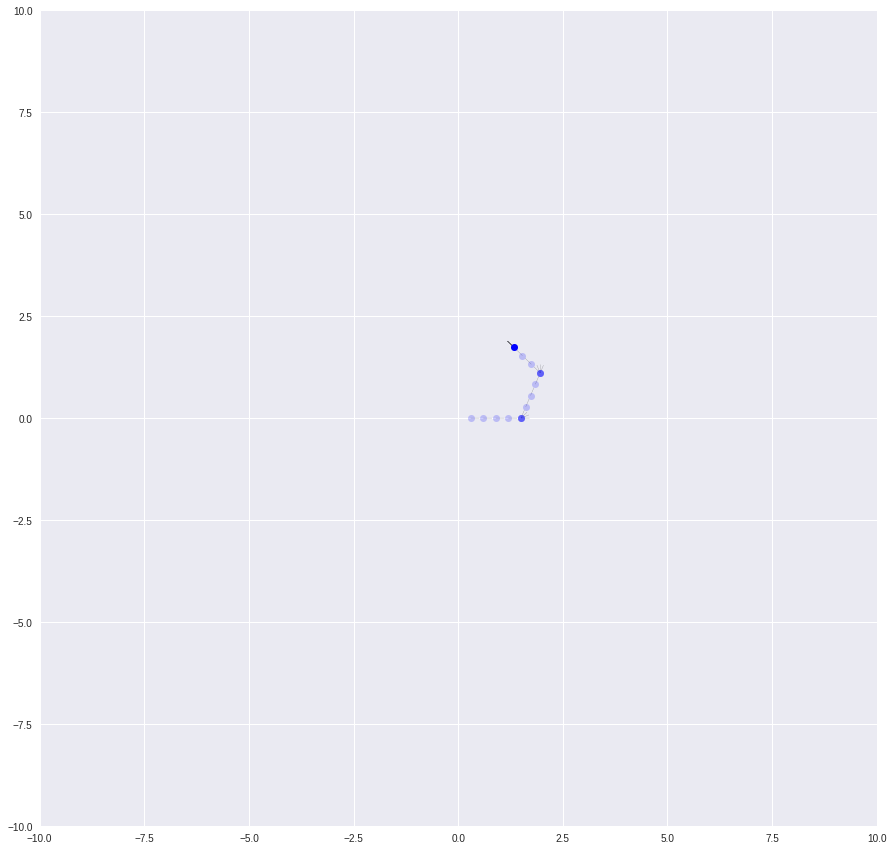

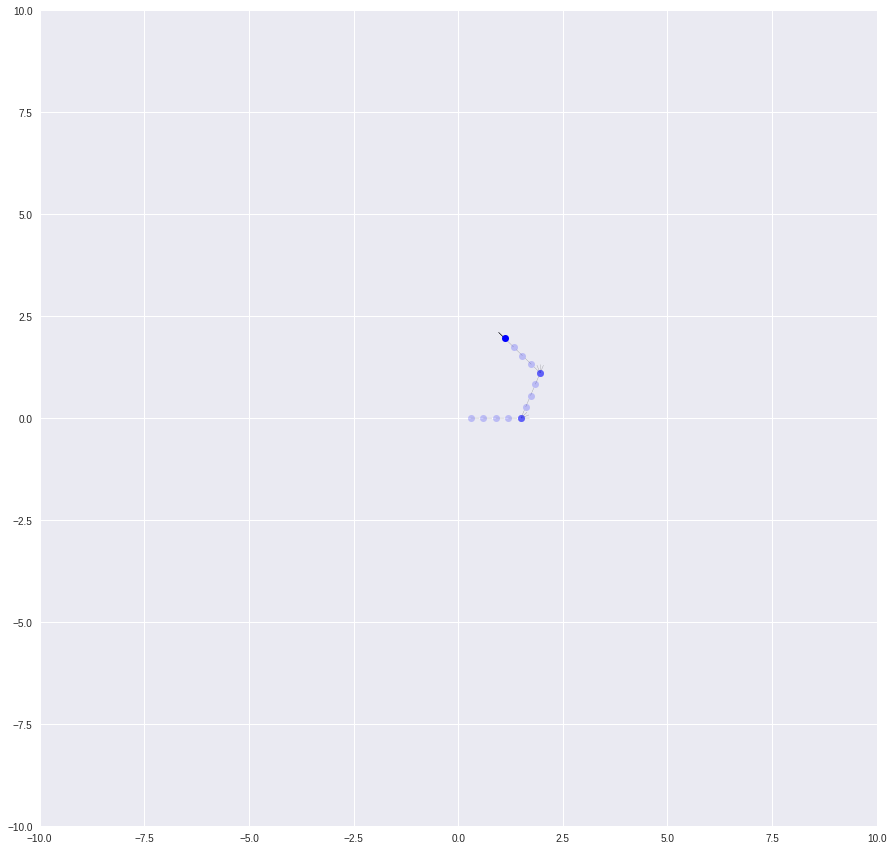

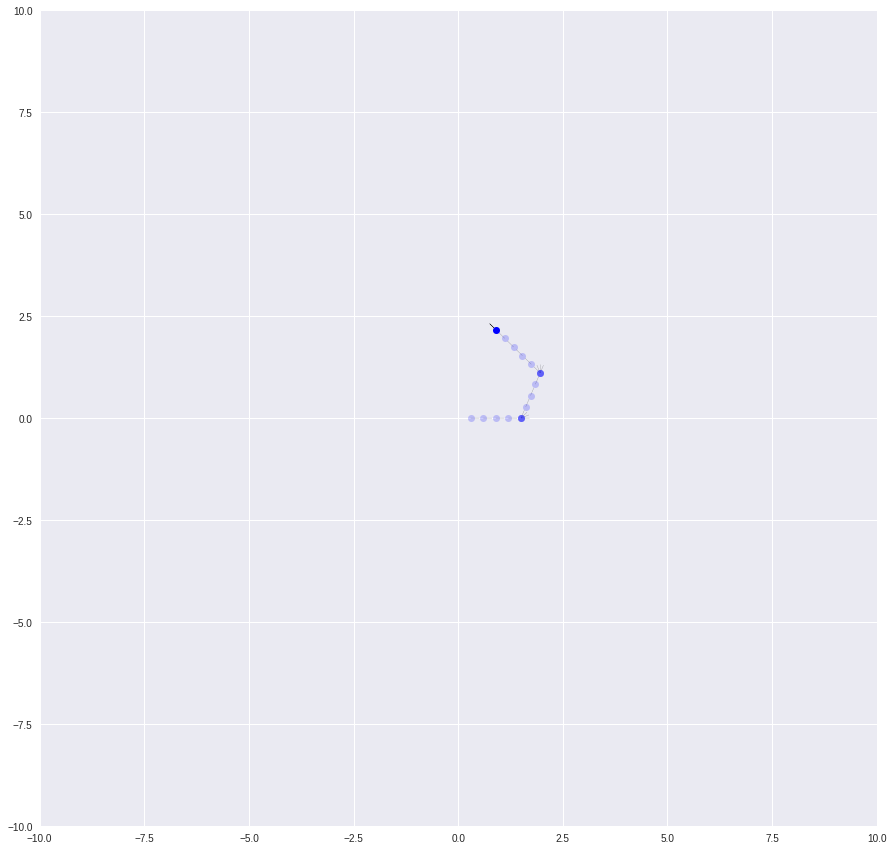

In [53]:
mpers = 0.2       # 0.2m per second
apers = math.radians(15) # 45 degrees per second

#-- initial position
mcs = Coordinate()
mcs_t = getMs()

mcs_list = []

for tick in range(20):
    time_delta = 1500. # assume constant tick of 1000 Ms
    
    # first, drive forward
    if tick < 5:
        t = Coordinate((time_delta/1000.)*mpers, 0., 0)
    elif tick >= 5 and tick < 8:
        t = Coordinate(0., 0., (time_delta/1000.)*apers)
    elif tick >= 8 and tick < 12:
        t = Coordinate((time_delta/1000.)*mpers, 0., 0)
    elif tick >= 12 and tick < 15:
        t = Coordinate(0., 0., (time_delta/1000.)*apers)
    elif tick <= 15 and tick < 20:
        t = Coordinate((time_delta/1000.)*mpers, 0., 0)
        
    mcs = integrate(mcs, t)
    mcs._print()
    mcs_list.append(mcs)
    plotMap(mcs, mcs_list)